In [5]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
# Download VADER lexicon (only once)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Sahana
[nltk_data]     Dhandapani\AppData\Roaming\nltk_data...


True

In [13]:
import os 
os.chdir(r"C:\Users\Sahana Dhandapani\OneDrive\Documents")
df = pd.read_excel("unique_employee.xlsx")

In [14]:
print(df.head())

                                            Response
0  The company needs to focus more on improving e...
1  I feel like my efforts are not being recognize...
2  I can handle the workload, but it could be bet...
3  I feel neutral about my job. There’s no major ...
4  I really appreciate the feedback I receive reg...


In [17]:
response_column = ' Response'

In [19]:
df.columns = df.columns.str.strip()

In [20]:
print(df.columns)

Index(['Response'], dtype='object')


In [21]:
response_column = 'Response'

In [22]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define function to classify sentiment
def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [23]:
# Apply sentiment analysis
df['Sentiment_Score'] = df[response_column].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df['Sentiment'] = df['Sentiment_Score'].apply(get_sentiment)

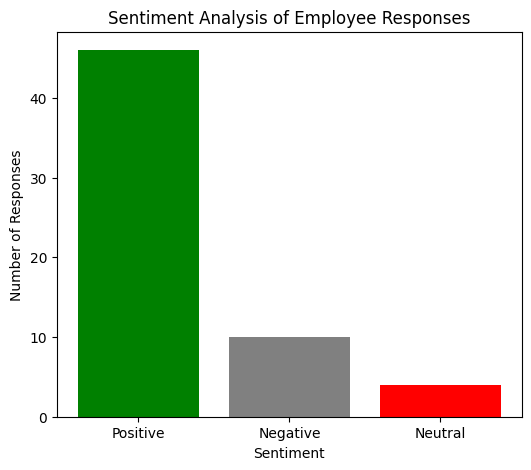

In [26]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'grey', 'red'])
plt.title('Sentiment Analysis of Employee Responses')
plt.xlabel('Sentiment')
plt.ylabel('Number of Responses')
plt.show()

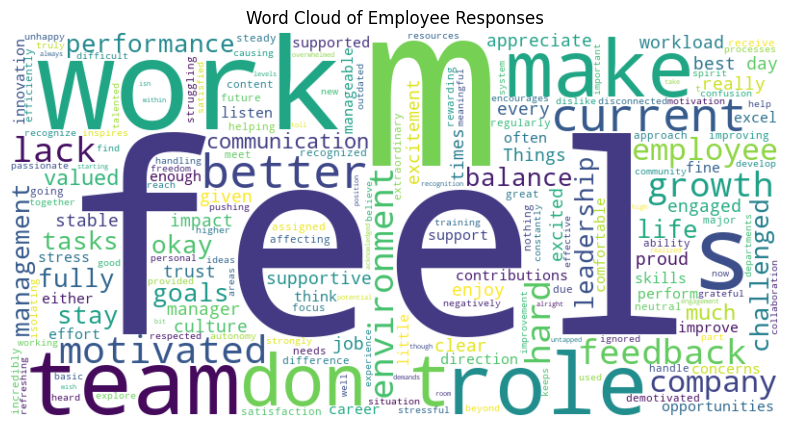

In [27]:
# --- Generate Word Cloud ---
all_text = ' '.join(df[response_column].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Employee Responses')
plt.show()